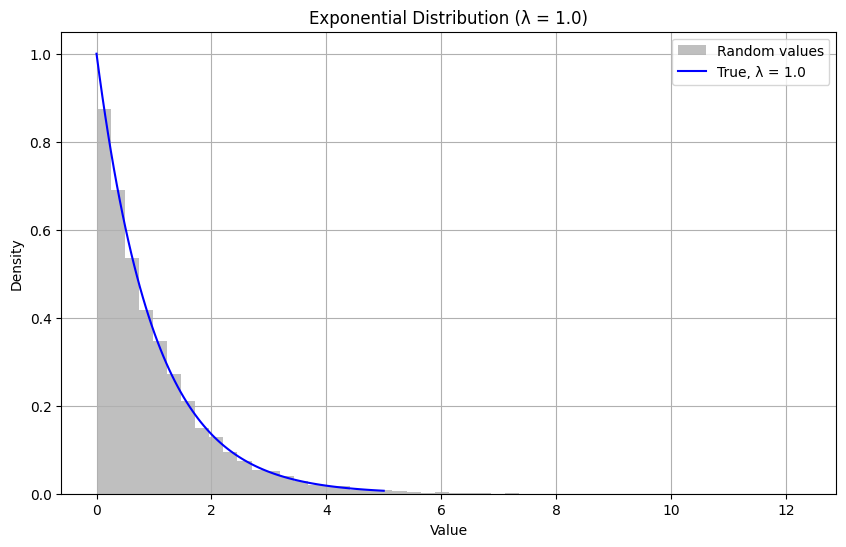

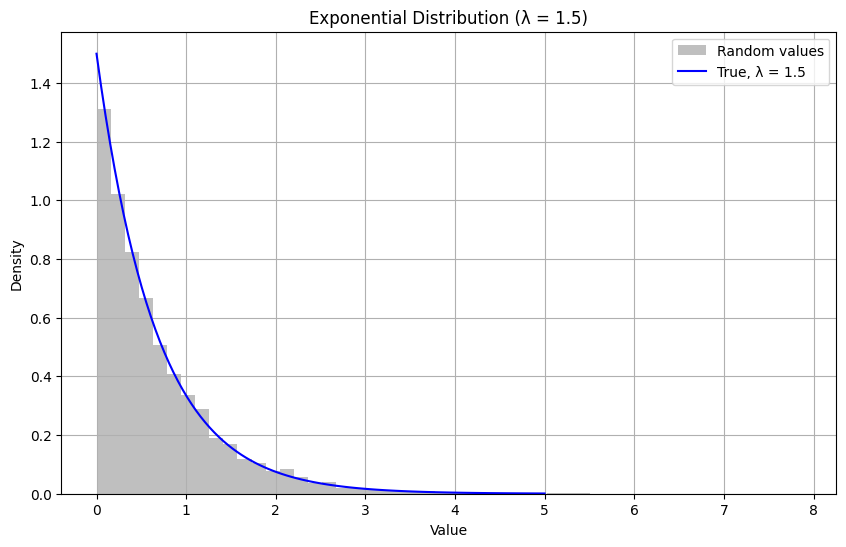

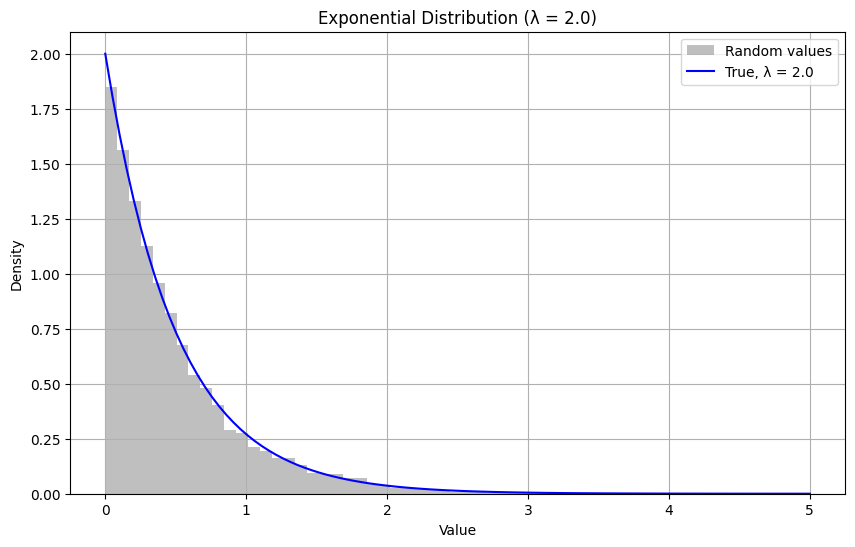

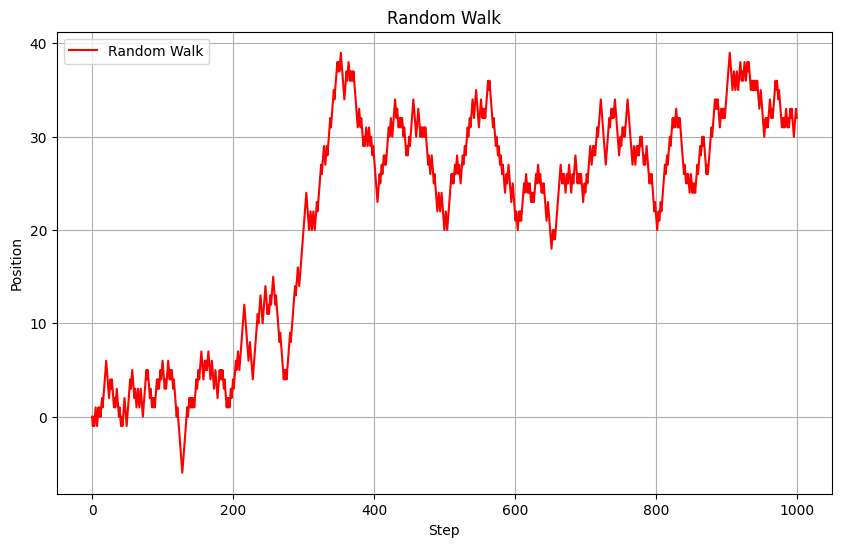

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 指数分布のプロット
def plot_exp_distribution(file_name, lambda_value):
    data = pd.read_csv(file_name, header=None)
    values = data[0]
    
    plt.figure(figsize=(10, 6))
    # ヒストグラム
    plt.hist(values, bins=50, density=True, alpha=0.5, color='gray', label='Random values')
    
    # 正しい確率密度関数
    x = np.linspace(0, 5, 100)
    pdf = lambda_value * np.exp(-lambda_value * x)
    plt.plot(x, pdf, 'b', label=f'True, λ = {lambda_value}')

    plt.title(f'Exponential Distribution (λ = {lambda_value})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'lambda_{lambda_value}_plot.png')
    plt.show()

# ランダムウォークのプロット
def plot_random_walk(file_name):
    data = pd.read_csv(file_name, header=None)
    values = data[0]
    plt.figure(figsize=(10, 6))
    plt.plot(values, color='r', label='Random Walk')
    plt.title('Random Walk')
    plt.xlabel('Step')
    plt.ylabel('Position')
    plt.legend()
    plt.grid(True)
    plt.savefig('random_walk_plot.png')
    plt.show()

# 指数分布のプロット
plot_exp_distribution('lambda_1.csv', 1.0)
plot_exp_distribution('lambda_1.5.csv', 1.5)
plot_exp_distribution('lambda_2.csv', 2.0)

# ランダムウォークのプロット
plot_random_walk('random_walk.csv')


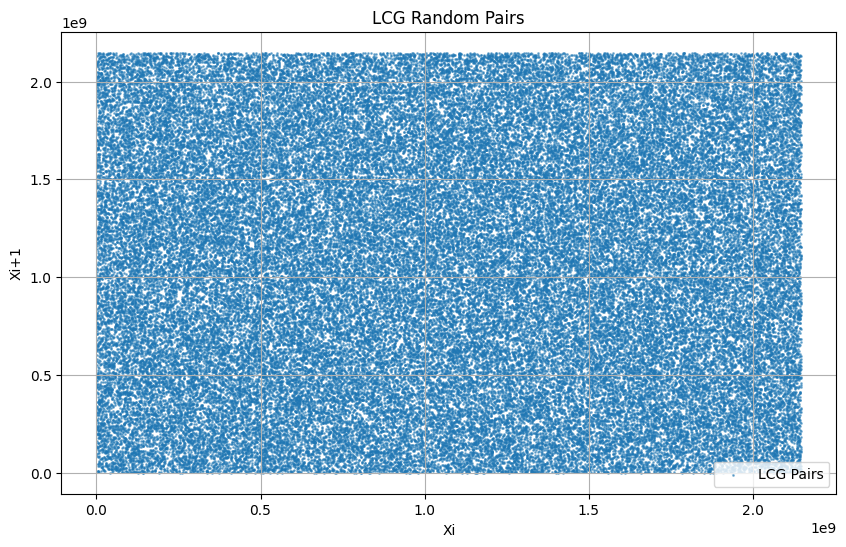

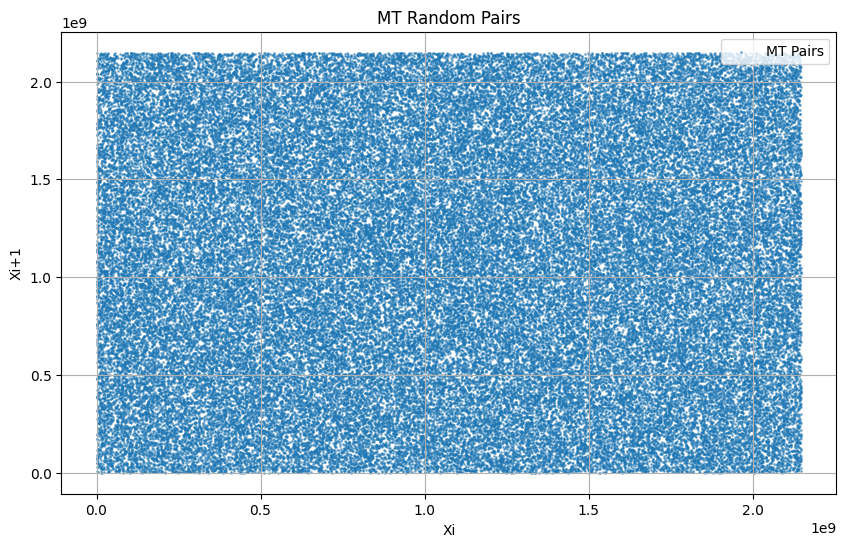

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 線形合同法のプロット
def plot_lcg(file_name):
    data = pd.read_csv(file_name, header=None)
    x = data[0]
    y = data[1]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s=1, alpha=0.5, label='LCG Pairs')
    plt.title('LCG Random Pairs')
    plt.xlabel('Xi')
    plt.ylabel('Xi+1')
    plt.legend()
    plt.grid(True)
    plt.savefig('lcg_pairs_plot.png')
    plt.show()

# メルセンヌ・ツイスタのプロット
def plot_mt(file_name):
    data = pd.read_csv(file_name, header=None)
    x = data[0]
    y = data[1]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, s=1, alpha=0.5, label='MT Pairs')
    plt.title('MT Random Pairs')
    plt.xlabel('Xi')
    plt.ylabel('Xi+1')
    plt.legend()
    plt.grid(True)
    plt.savefig('mt_pairs_plot.png')
    plt.show()

# 線形合同法のプロット
plot_lcg('lcg_pairs.csv')

# メルセンヌ・ツイスタのプロット
plot_mt('mt_pairs.csv')


/var/folders/yq/n92hvtxd3t90q2ytp1rwngmh0000gn/T/ipykernel_2802/4274178152.py:23: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  theoretical_probabilities = [(np.exp(-lambda_value) * (lambda_value ** k)) / np.math.factorial(k) for k in ks]


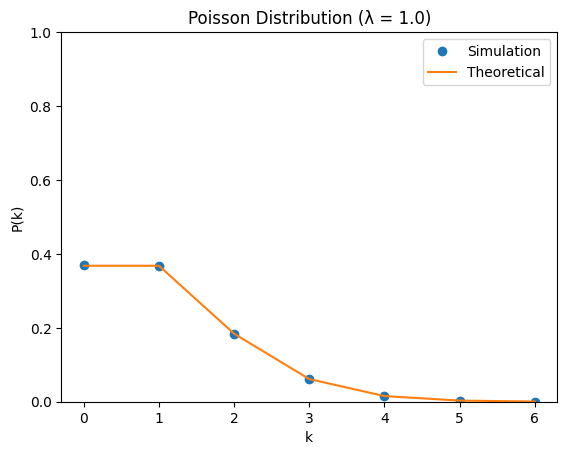

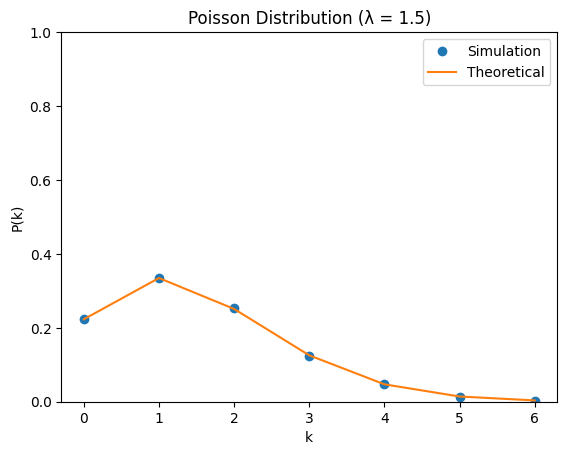

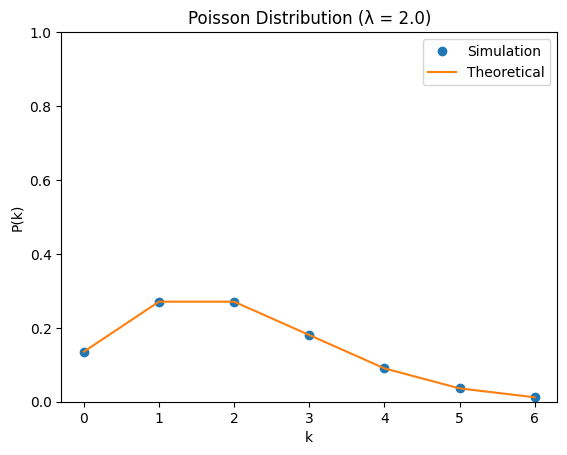

In [6]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def plot_poisson_distribution(lambda_value, filename):
    # k
    ks = [k for k in range(0, 7)]

    # p_k
    times = []

    with open(filename, mode='r') as file:
        reader = csv.reader(file)
        index = -1
        for row in reader:
            index += 1
            if index == 0 or index >= 8:
                continue
            times.append(float(row[1]))

    # 理論値の計算
    theoretical_probabilities = [(np.exp(-lambda_value) * (lambda_value ** k)) / np.math.factorial(k) for k in ks]

    plt.figure()
    plt.ylim([0, 1])
    plt.plot(ks, times, 'o', label='Simulation')
    plt.plot(ks, theoretical_probabilities, '-', label='Theoretical')
    plt.title(f'Poisson Distribution (λ = {lambda_value})')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.legend()
    plt.show()

lambda_values = [1.0, 1.5, 2.0]

for lambda_value in lambda_values:
    filename = f"histogram_p_k_lambda_{lambda_value}.csv"
    plot_poisson_distribution(lambda_value, filename)


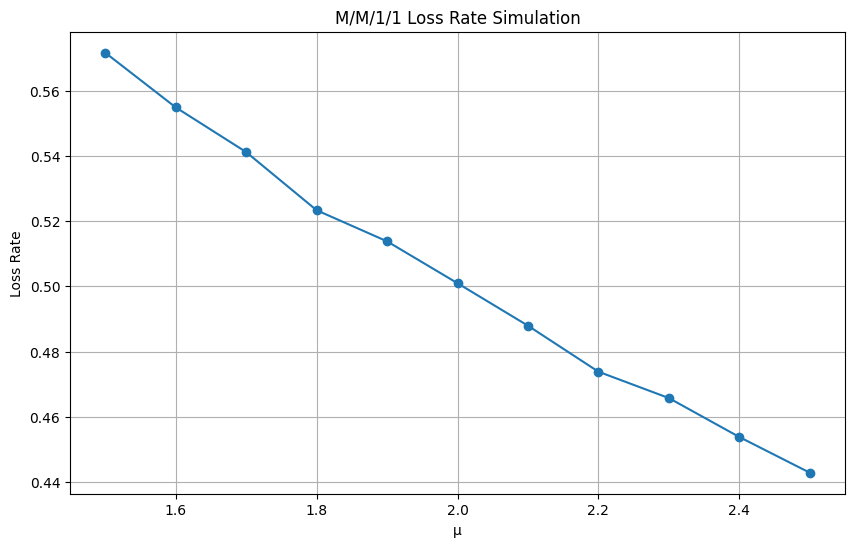

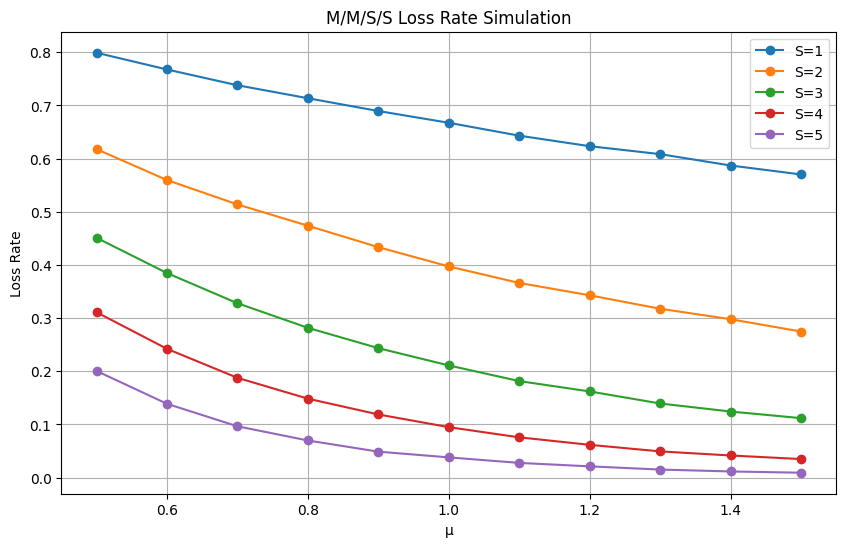

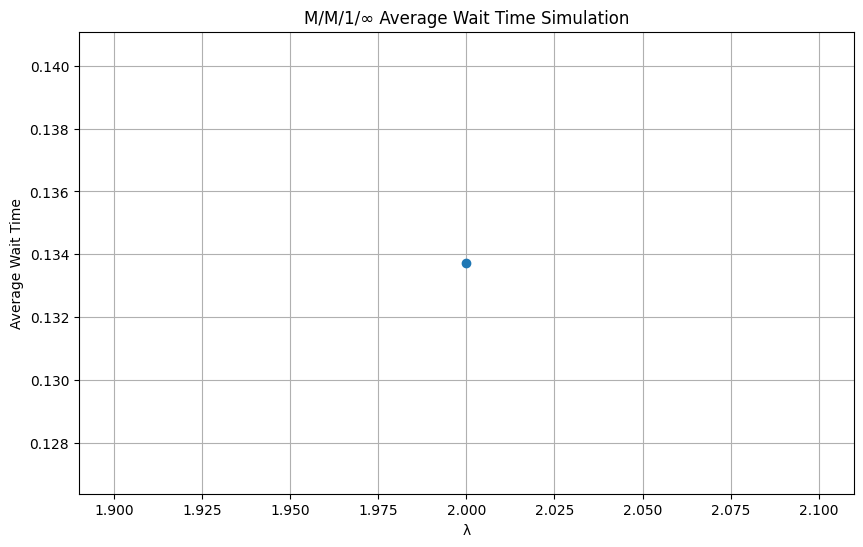

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 課題3-2の結果をプロット
results_3_2 = pd.read_csv("results_3_2.csv")
plt.figure(figsize=(10, 6))
plt.plot(results_3_2['mu'], results_3_2['loss_rate'], marker='o')
plt.xlabel('μ')
plt.ylabel('Loss Rate')
plt.title('M/M/1/1 Loss Rate Simulation')
plt.grid(True)
plt.savefig("plot_3_2.png")
plt.show()

# 課題3-3の結果をプロット
results_3_3 = pd.read_csv("results_3_3.csv")
plt.figure(figsize=(10, 6))
for s in results_3_3['S'].unique():
    subset = results_3_3[results_3_3['S'] == s]
    plt.plot(subset['mu'], subset['loss_rate'], marker='o', label=f'S={s}')
plt.xlabel('μ')
plt.ylabel('Loss Rate')
plt.title('M/M/S/S Loss Rate Simulation')
plt.legend()
plt.grid(True)
plt.savefig("plot_3_3.png")
plt.show()

# 課題3-Aの結果をプロット
results_3_A = pd.read_csv("results_3_A.csv")
plt.figure(figsize=(10, 6))
plt.plot(results_3_A['lambda'], results_3_A['average_wait_time'], marker='o')
plt.xlabel('λ')
plt.ylabel('Average Wait Time')
plt.title('M/M/1/∞ Average Wait Time Simulation')
plt.grid(True)
plt.savefig("plot_3_A.png")
plt.show()
